In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

In [3]:
os.chdir('/content/drive/MyDrive/Colab_Notebooks/leaf/')

In [5]:
!git clone git@github.com:mbocquel/Leaffliction.git

Cloning into 'Leaffliction'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [ ]:
!python3 -m unittest

2024-05-23 10:42:03.211717: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 10:42:03.211767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 10:42:03.213108: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-23 10:42:03.220349: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-23 10:42:04.208669: W tensorflow/comp

In [ ]:
import argparse
import os
from model.my_CNN_model import My_CNN_model
from dataloader.Augmentation import Augmentation
from dataloader.Distribution import Distribution
from dataloader.Balance import Balance
from configs.CFG import CFG
from utils.config import Config
import logging


In [ ]:
config = Config.from_json(CFG)

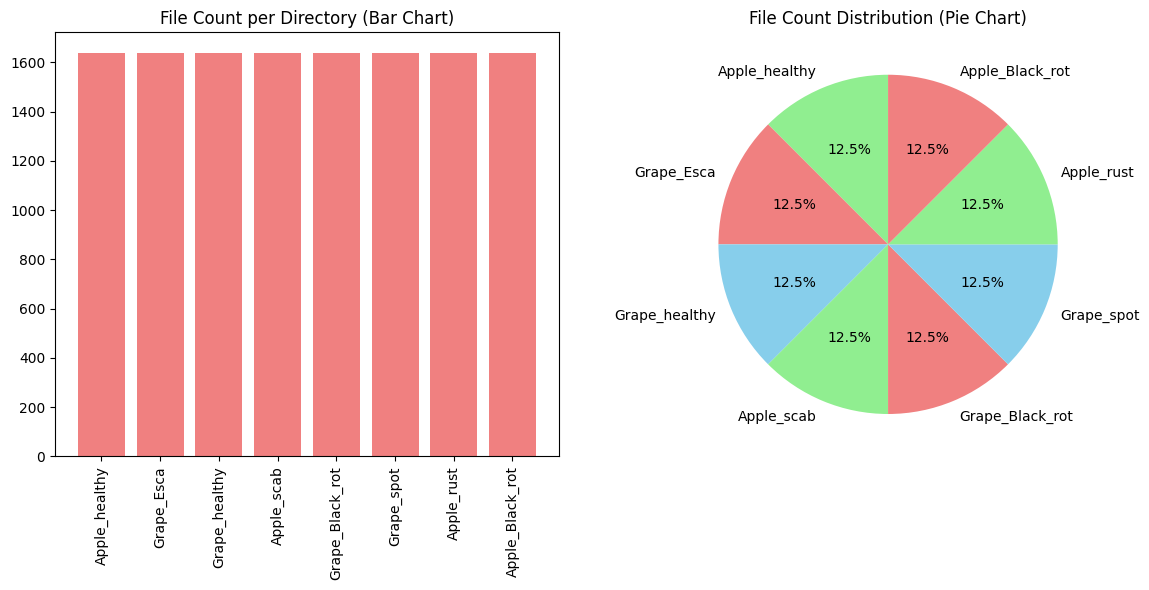

In [ ]:
Distribution(config.data.path).plot()

In [ ]:
model = My_CNN_model(CFG)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model.load_data()

Found 13120 files belonging to 8 classes.
Using 10496 files for training.
Using 2624 files for validation.


INFO:dataloader.dataloader:Found 8 classes: ['Apple_Black_rot', 'Apple_healthy', 'Apple_rust', 'Apple_scab', 'Grape_Black_rot', 'Grape_Esca', 'Grape_healthy', 'Grape_spot']
INFO:dataloader.dataloader:Number of batches: 328
INFO:model.my_CNN_model:Dataset loaded


In [ ]:
model.build()

INFO:model.my_CNN_model:Model build


In [ ]:
model.load("my_cnn_model2.keras")

In [ ]:
for layer in model.model.layers:
  layer.trainable = True

In [ ]:
model.evaluate()

Evaluate
82/82 [==============================] - 464s 6s/step - loss: 0.9390 - accuracy: 0.8247


{'loss': 0.9390003681182861, 'accuracy': 0.8246951103210449}

In [ ]:
model.model.layers[1].trainable

True

In [ ]:
import tensorflow as tf

In [ ]:
class SaveModelCallback(tf.keras.callbacks.Callback):
    def __init__(self, filepath):
        super(SaveModelCallback, self).__init__()
        self.filepath = filepath

    def on_epoch_end(self, epoch, logs=None):
        self.model.save(self.filepath)


In [ ]:
save_callback = SaveModelCallback(filepath=model.save_name)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model_history = model.model.fit(model.train_dataset,
                                       epochs=model.epoches,
                                       validation_data=model.val_dataset,
                                       verbose=1,
                                       callbacks=[save_callback, early_stopping])

Epoch 1/25
328/328 [==============================] - 1840s 5s/step - loss: 0.6654 - accuracy: 0.8659 - val_loss: 0.6535 - val_accuracy: 0.8826
Epoch 2/25
328/328 [==============================] - 65s 195ms/step - loss: 0.6904 - accuracy: 0.8528 - val_loss: 0.6616 - val_accuracy: 0.8624
Epoch 3/25
328/328 [==============================] - 75s 226ms/step - loss: 0.6738 - accuracy: 0.8620 - val_loss: 0.7305 - val_accuracy: 0.8563
Epoch 4/25
328/328 [==============================] - 75s 226ms/step - loss: 0.6769 - accuracy: 0.8576 - val_loss: 0.6799 - val_accuracy: 0.8712
Epoch 5/25
328/328 [==============================] - 69s 206ms/step - loss: 0.6639 - accuracy: 0.8608 - val_loss: 0.6366 - val_accuracy: 0.8769
Epoch 6/25
328/328 [==============================] - 76s 229ms/step - loss: 0.6542 - accuracy: 0.8676 - val_loss: 0.6790 - val_accuracy: 0.8681
Epoch 7/25
328/328 [==============================] - 76s 228ms/step - loss: 0.6582 - accuracy: 0.8662 - val_loss: 0.7760 - val_acc

In [ ]:
from PIL import Image

In [ ]:
test = Image.open("img/result.png", "r")

In [ ]:
test_arr = np.array(test)

In [ ]:
test.size

(566, 403)

In [ ]:
toto = test.resize((100,24))

In [ ]:
import numpy as np

In [ ]:
np.array(toto).shape

(24, 100, 4)

In [ ]:
toto = Image.open("img_for_test/Augmentation/img.JPG", "r")
print('Fish RGB-A shape is ' + str(np.array(toto).shape))
grey = toto.convert('L')
print('Fish RGB shape is ' + str(np.array(grey).shape))

Fish RGB-A shape is (256, 256, 3)
Fish RGB shape is (256, 256)


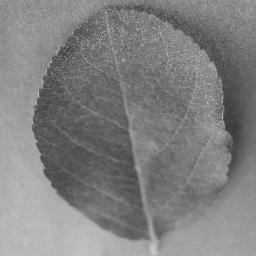

In [ ]:
grey

Fish RGB shape is (256, 256, 3)


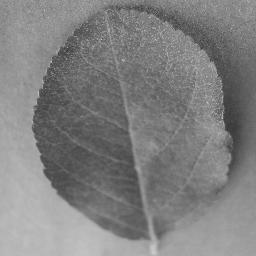

In [ ]:
rgb = grey.convert('RGB')
print('Fish RGB shape is ' + str(np.array(rgb).shape))
rgb